In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
!pip install pysal
!pip install geoplot
import pysal
import seaborn as sns
import folium

ModuleNotFoundError: No module named 'folium'

In [11]:
# For points map
import geoplot.crs as gcrs
import geoplot as gplt
import re

In [5]:
# Open listings file
listings = pd.read_csv('D:/Divya/Placements/python_code/dataset/listings.csv',
                       usecols=['id', 'property_type', 'neighbourhood_cleansed',
                                'bedrooms', 'beds', 'bathrooms_text', 'price',
                                'latitude','longitude'])

In [6]:
listings

id  neighbourhood_cleansed   latitude  longitude  \
0      108061                   28801  35.606700 -82.555630   
1     4394761                   28801  35.612440 -82.557240   
2     4448604                   28804  35.622231 -82.561401   
3     4515772                   28801  35.591910 -82.544880   
4     4587394                   28805  35.587120 -82.492660   
...       ...                     ...        ...        ...   
3234  4173713                   28804  35.653450 -82.542793   
3235  4241484                   28803  35.546160 -82.517040   
3236  4285157                   28805  35.586680 -82.501990   
3237  4304358                   28805  35.586680 -82.501990   
3238  4394670                   28804  35.635950 -82.533660   

             property_type bathrooms_text  bedrooms  beds    price  
0       Entire rental unit         1 bath       1.0   1.0  $100.00  
1       Entire rental unit         1 bath       2.0   1.0  $114.00  
2       Entire guest suite         1 bath       1.0   2.0   $41.00  
3              Entire home         1 bath       2.0   2.0  $200.00  
4             Entire cabin         1 bath       1.0   1.0   $75.00  
...                    ...            ...       ...   ...      ...  
3234    Entire rental unit         1 bath       1.0   1.0  $240.00  
3235           Entire home         1 bath       3.0   3.0  $119.00  
3236  Private room in home  1 shared bath       NaN   1.0   $54.00  
3237  Private room in home  1 shared bath       NaN   1.0   $58.00  
3238           Entire home         1 bath       1.0   2.0   $75.00  

[3239 rows x 9 columns]

In [7]:
# Rename column
listings = listings.rename(columns={'neighbourhood_cleansed':'neighbourhood'}).astype(object)

#listings.columns
listings.sample(4)

id neighbourhood  latitude longitude  \
1709            48444621         28715   35.5486 -82.64948   
2506  668081997613842660         28801  35.60245 -82.54673   
2640  719605170711816265         28803  35.48898 -82.51355   
1414            43279322         28806  35.56988 -82.59112   

           property_type bathrooms_text bedrooms beds    price  
1709  Entire rental unit        2 baths      2.0  2.0  $125.00  
2506         Entire home         1 bath      2.0  2.0  $271.00  
2640         Entire home        3 baths      3.0  4.0  $226.00  
1414  Entire guest suite        2 baths      2.0  3.0  $165.00

In [13]:
listings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3239 non-null   object
 1   neighbourhood  3239 non-null   object
 2   latitude       3239 non-null   object
 3   longitude      3239 non-null   object
 4   property_type  3239 non-null   object
 5   bedrooms       2768 non-null   object
 6   beds           3211 non-null   object
 7   price          3239 non-null   object
 8   bathrooms      3239 non-null   int32 
dtypes: int32(1), object(8)
memory usage: 215.2+ KB


In [9]:
# Data PreProcessing 

# Filling the NA in the bathroom text variable with zero
listings['bathrooms_text'].fillna('0 bath', inplace=True)

In [12]:
# Correcting the bathroom variable to numeric
listings['bathrooms'] = listings.bathrooms_text.apply(lambda x: re.findall('[\d+]', x)[0] if len(re.findall('[\d+]', x)) > 0 else 0)
listings['bathrooms'] = listings.bathrooms.astype(int)

# Delete bathrooms text
listings.drop('bathrooms_text', axis=1, inplace=True)

In [14]:
# Correct Price to Float (Replace $ and , with nothing)
listings['price'] = (listings['price']
                     .replace("[$,]", "", regex=True)
                     .astype(float)
                     )

In [15]:
# Check if all correct
listings = listings.reindex(columns=str.split('id,neighbourhood,property_type,bedrooms,beds,bathrooms,latitude,longitude,price', sep=','))
listings.head(2)

id neighbourhood       property_type bedrooms beds  bathrooms  \
0   108061         28801  Entire rental unit      1.0  1.0          1   
1  4394761         28801  Entire rental unit      2.0  1.0          1   

   latitude longitude  price  
0   35.6067 -82.55563  100.0  
1  35.61244 -82.55724  114.0

In [16]:
listings.describe(include='all')

id  neighbourhood property_type  bedrooms    beds    bathrooms  \
count     3239.0         3239.0          3239    2768.0  3211.0  3239.000000   
unique    3239.0            8.0            49       9.0    18.0          NaN   
top     108061.0        28806.0   Entire home       1.0     1.0          NaN   
freq         1.0          939.0          1163    1120.0  1134.0          NaN   
mean         NaN            NaN           NaN       NaN     NaN     1.485644   
std          NaN            NaN           NaN       NaN     NaN     0.808976   
min          NaN            NaN           NaN       NaN     NaN     0.000000   
25%          NaN            NaN           NaN       NaN     NaN     1.000000   
50%          NaN            NaN           NaN       NaN     NaN     1.000000   
75%          NaN            NaN           NaN       NaN     NaN     2.000000   
max          NaN            NaN           NaN       NaN     NaN     9.000000   

          latitude   longitude        price  
count   3239.00000  3239.00000  3239.000000  
unique  2849.00000  2908.00000          NaN  
top       35.59524   -82.55219          NaN  
freq      11.00000     9.00000          NaN  
mean           NaN         NaN   179.771843  
std            NaN         NaN   156.068212  
min            NaN         NaN    14.000000  
25%            NaN         NaN    95.000000  
50%            NaN         NaN   135.000000  
75%            NaN         NaN   212.500000  
max            NaN         NaN  2059.000000

#Insights :   49 property type can be seen in Ashvillie NYC of Entire home
             Home with 1 bedroom and 1-2 bathrooms with average price of $180 with dataset of 3239.

In [17]:
listings.price.describe()

count    3239.000000
mean      179.771843
std       156.068212
min        14.000000
25%        95.000000
50%       135.000000
75%       212.500000
max      2059.000000
Name: price, dtype: float64

In [18]:
np.quantile(listings['price'],0.97)

538.3000000000006

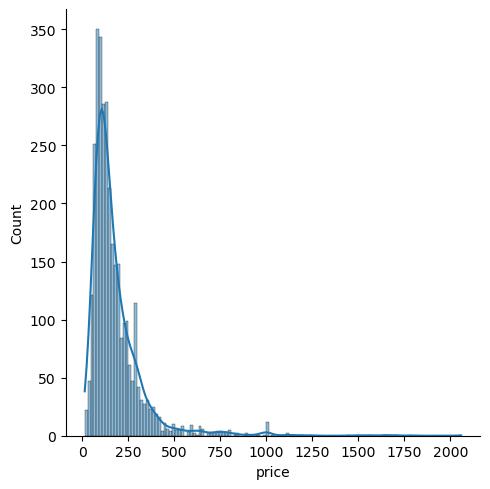

In [19]:
# checking the price range
sns.displot(listings['price'],kde=True)

In [21]:
# converting the pandas dataframe to geopandas dataframe 

listings_gdf = gpd.GeoDataFrame(listings,
                               geometry= gpd.points_from_xy(listings.longitude,listings.latitude,crs = 4326))

In [22]:
listings_gdf.head()

id neighbourhood       property_type bedrooms beds  bathrooms  \
0   108061         28801  Entire rental unit      1.0  1.0          1   
1  4394761         28801  Entire rental unit      2.0  1.0          1   
2  4448604         28804  Entire guest suite      1.0  2.0          1   
3  4515772         28801         Entire home      2.0  2.0          1   
4  4587394         28805        Entire cabin      1.0  1.0          1   

    latitude  longitude  price                    geometry  
0    35.6067  -82.55563  100.0  POINT (-82.55563 35.60670)  
1   35.61244  -82.55724  114.0  POINT (-82.55724 35.61244)  
2  35.622231 -82.561401   41.0  POINT (-82.56140 35.62223)  
3   35.59191  -82.54488  200.0  POINT (-82.54488 35.59191)  
4   35.58712  -82.49266   75.0  POINT (-82.49266 35.58712)

C:\Users\Admin\anaconda3\Lib\site-packages\geoplot\geoplot.py:1659: UserWarning: "webmap" is only compatible with the "WebMercator" projection, but the input projection is unspecified. Reprojecting the data to "WebMercator" automatically. To suppress this warning, set "projection=gcrs.WebMercator()" explicitly.
  warnings.warn(


<GeoAxes: >

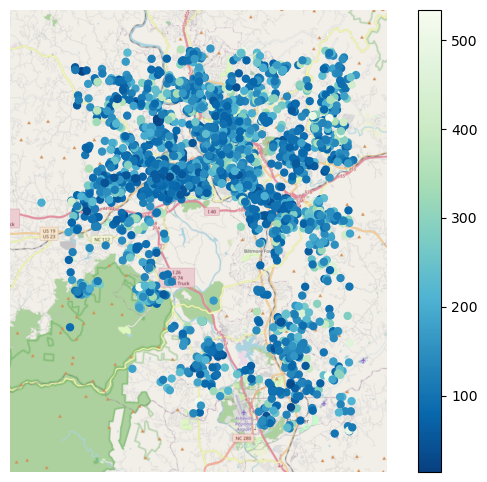

In [39]:
# points the map using geoplot 

ax = gplt.webmap(listings_gdf.query('price<538'))
#projection = gcrs.WebMercator()
listings_gdf.to_crs(epsg=3857)
gplt.pointplot(listings_gdf.query('price<538'),cmap ='GnBu_r',ax=ax,hue='price',legend=True)

In [32]:
# reading the shapefile of the neighbourhood

asheville = gpd.read_file('D:/Divya/Placements/python_code/dataset/neighbourhoods.geojson')
asheville = asheville.to_crs(4326)

In [35]:
asheville.head()
asheville.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        8 non-null      object  
 1   neighbourhood_group  0 non-null      float64 
 2   geometry             8 non-null      geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 324.0+ bytes


<GeoAxes: >

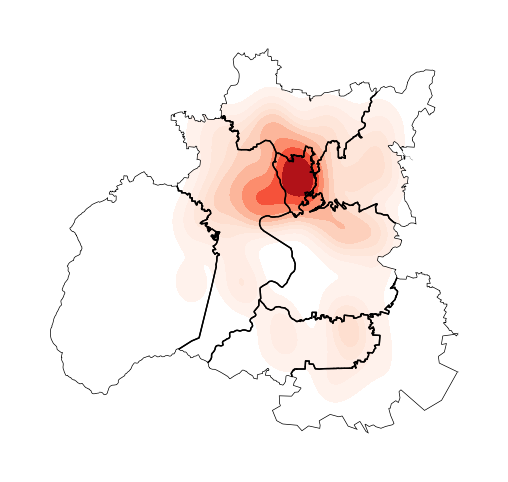

In [38]:
# generating the heatmap 

ax = gplt.kdeplot(listings_gdf,
                  fill=True,cmap = 'Reds',
                  clip=asheville.geometry,
                 projection = gcrs.WebMercator())
# ploting a heatmap on top of the geometry
gplt.polyplot(asheville,ax=ax,zorder=1)

In [41]:
# Using folium

from numpy import Inf

# creating a clip levels for prices
listings['price_bins']= pd.cut(listings.price,
                              bins=[-Inf,100,200,300,400,500,Inf],
                              labels = ['0-100','100-200','200-300','300-400','400-500','500+'])
# Creating a bin color to the clipped prices 

listings['colors'] = listings.price_bins.map({'0-100': 'forestgreen', '100-200':'blue', '200-300':'gold', '300-400':'orange', '400-500':'red', '500+':'black'})
listings.head()

id neighbourhood       property_type bedrooms beds  bathrooms  \
0   108061         28801  Entire rental unit      1.0  1.0          1   
1  4394761         28801  Entire rental unit      2.0  1.0          1   
2  4448604         28804  Entire guest suite      1.0  2.0          1   
3  4515772         28801         Entire home      2.0  2.0          1   
4  4587394         28805        Entire cabin      1.0  1.0          1   

    latitude  longitude  price price_bins       colors  
0    35.6067  -82.55563  100.0      0-100  forestgreen  
1   35.61244  -82.55724  114.0    100-200         blue  
2  35.622231 -82.561401   41.0      0-100  forestgreen  
3   35.59191  -82.54488  200.0    100-200         blue  
4   35.58712  -82.49266   75.0      0-100  forestgreen

In [44]:
pip install folium

                                              0.0/102.3 kB ? eta -:--:--
                                              0.0/102.3 kB ? eta -:--:--
     ------------------------------------     92.2/102.3 kB ? eta -:--:--
     ------------------------------------     92.2/102.3 kB ? eta -:--:--
     ------------------------------------     92.2/102.3 kB ? eta -:--:--
     ------------------------------------     92.2/102.3 kB ? eta -:--:--
     ------------------------------------     92.2/102.3 kB ? eta -:--:--
     ------------------------------------     92.2/102.3 kB ? eta -:--:--
     ------------------------------------     92.2/102.3 kB ? eta -:--:--
     ------------------------------------ 102.3/102.3 kB 279.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Adding markers to the map
import folium
m =folium.Map(location=[35.5951, -82.5515],zoom_start=10)

for lat,lon,ptcolor in zip(listings.latitude,listings.longitude,listings.colors):
    folium.CircleMarker(
     location=[lat, lon],
     radius=1.5,
     opacity=0.5,
     color=ptcolor,
     fill=True,
     fill_color=ptcolor,
  ).add_to(m)

In [47]:
from folium import plugins

# preparing the data for the plot 
data = listings[['latitude','longitude','price']].values
data.tolist()

[[35.6067, -82.55563, 100.0],
 [35.61244, -82.55724, 114.0],
 [35.622231, -82.561401, 41.0],
 [35.59191, -82.54488, 200.0],
 [35.58712, -82.49266, 75.0],
 [35.57246, -82.57321, 77.0],
 [35.58651, -82.50186, 45.0],
 [35.4456, -82.46756, 210.0],
 [35.57754, -82.59151, 222.0],
 [35.57923, -82.57162, 124.0],
 [35.57424, -82.53288, 94.0],
 [35.58165, -82.59795, 93.0],
 [35.62464, -82.52114, 225.0],
 [35.58072, -82.59573, 150.0],
 [35.59623, -82.55357, 144.0],
 [35.60858, -82.48867, 206.0],
 [35.56642, -82.54681, 236.0],
 [35.46994, -82.55996, 49.0],
 [35.62436, -82.49177, 99.0],
 [35.5751, -82.59686, 200.0],
 [35.61937, -82.55071, 128.0],
 [35.56809, -82.60639, 75.0],
 [35.58304, -82.53813, 143.0],
 [35.58265, -82.58182, 103.0],
 [35.44968, -82.5197, 68.0],
 [35.59712, -82.57044, 107.0],
 [35.54909, -82.48628, 263.0],
 [35.54977, -82.63776, 83.0],
 [35.6033, -82.55806, 132.0],
 [35.49363, -82.51539, 70.0],
 [35.57517, -82.57827, 107.0],
 [35.62716, -82.50869, 135.0],
 [35.42342, -82.47322, 

In [49]:
#creating a heatmap with folium 

hm = plugins.HeatMap(data,gradient={0.1: 'blue', 0.2: 'lime', 0.4: 'yellow', 0.6: 'orange', 0.9: 'red'},
                    min_opacity=0.1,
                    max_opacity=0.9,
                    radius=20,
                    use_local_extrema=False)
# Adding this to map 
hm.add_to(m)

m

In [50]:
# Add a choropleth layers

folium.Choropleth(
      geo_data = asheville,
      name = 'choropleth',
      data = listings,
      columns = ["neighbourhood","price"],
      key_on = 'feature.properties.neighbourhood',
      fill_color = 'RdBu_r',
      fill_opacity = 0.5,
      line_opacity=0.5,
      legend_name = 'Prices',
).add_to(m)

m


In [52]:
# Adding the choropleth layer to a terrain map 

m = folium.Map(location =[35.5951, -82.5515],zoom_start=10,tiles='stamen Terrain')

folium.Choropleth(
        geo_data = asheville,
        name="choropleth",
        data = listings,
        columns = ["neighbourhood","price"],
        key_on = "feature.properties.neighbourhood",
        fill_color = "RdBu_r",
        fill_opacity=0.5,
        line_opacity=0.5,
        radius = 20,
        legend_name ="Prices",
).add_to(m)

m